In [330]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

In [332]:
weight = 0.3
bias = 0.9
start = 0
end = 10
step = 0.1
X = torch.arange(start, end, step).unsqueeze(dim=1)

In [334]:
train_set, test_set = torch.utils.data.random_split(X, [0.8, 0.2])
X_train_set = torch.stack([train_set[i] for i in range(len(train_set))])
X_test_set = torch.stack([test_set[i] for i in range(len(test_set))])

In [336]:
y_train = weight * X_train_set + bias
y_test = weight * X_test_set + bias

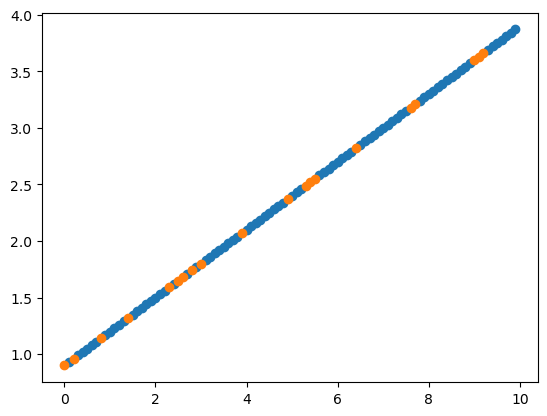

In [338]:
plt.scatter(X_train_set, y_train)
plt.scatter(X_test_set, y_test)

In [340]:
class LinearRegressionModel(nn.Module):
    # def __init__(self):
    #     weights = nn.Paramater(torch.randn(1), requires_grad=True)
    #     bias = nn.Paramater(torch.randn(1), requires_grad=True)

    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.layer(x)

In [342]:
test = LinearRegressionModel()
test.state_dict()

OrderedDict([('layer.weight', tensor([[-0.9676]])),
             ('layer.bias', tensor([-0.5727]))])

In [344]:
with torch.inference_mode():
    y_pred = test(X_test_set.unsqueeze(1))

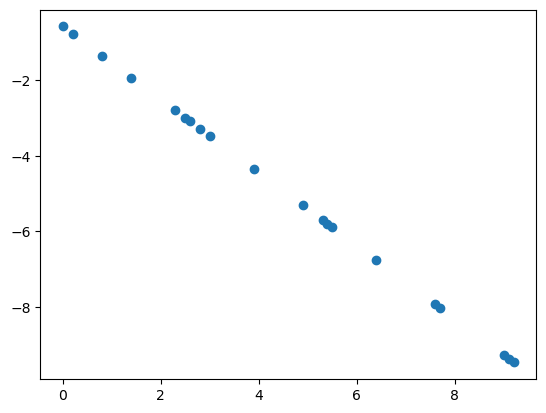

In [348]:
plt.scatter(X_test_set, y_pred)

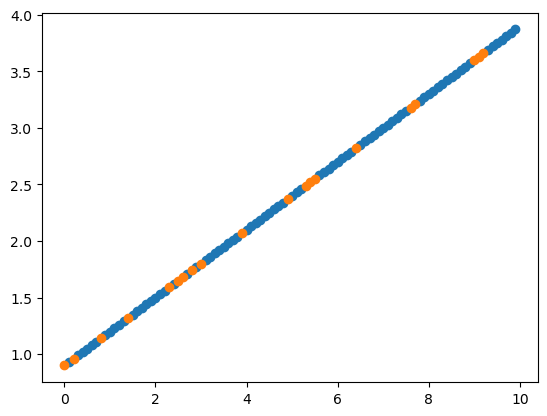

In [352]:
plt.scatter(X_train_set, y_train)
plt.scatter(X_test_set, y_test)

In [354]:
# loss funciton calculates the loss of accuracy between the predicted and actual (something like mean squared error etc.)
#
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=test.parameters(), lr=0.01)

In [376]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 300

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    test.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = test(X_train_set)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    test.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = test(X_test_set)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.21566429734230042 | MAE Test Loss: 0.046846382319927216 
Epoch: 20 | MAE Train Loss: 0.21566429734230042 | MAE Test Loss: 0.046846382319927216 
Epoch: 40 | MAE Train Loss: 0.21566429734230042 | MAE Test Loss: 0.046846382319927216 
Epoch: 60 | MAE Train Loss: 0.21566429734230042 | MAE Test Loss: 0.046846382319927216 
Epoch: 80 | MAE Train Loss: 0.21566429734230042 | MAE Test Loss: 0.046846382319927216 
Epoch: 100 | MAE Train Loss: 0.21566429734230042 | MAE Test Loss: 0.046846382319927216 
Epoch: 120 | MAE Train Loss: 0.21566429734230042 | MAE Test Loss: 0.046846382319927216 
Epoch: 140 | MAE Train Loss: 0.21566429734230042 | MAE Test Loss: 0.046846382319927216 
Epoch: 160 | MAE Train Loss: 0.21566429734230042 | MAE Test Loss: 0.046846382319927216 
Epoch: 180 | MAE Train Loss: 0.21566429734230042 | MAE Test Loss: 0.046846382319927216 
Epoch: 200 | MAE Train Loss: 0.21566429734230042 | MAE Test Loss: 0.046846382319927216 
Epoch: 220 | MAE Train Loss: 0.2156642

tensor([[0.9645],
        [4.0206],
        [1.1705],
        [2.7158],
        [1.9260],
        [3.9863],
        [1.7886],
        [1.6856],
        [2.7501],
        [3.5055],
        [1.3766],
        [2.7844],
        [0.8958],
        [3.0935],
        [3.5399],
        [2.2350],
        [1.7543],
        [4.0549],
        [2.5784],
        [1.8573]]) tensor([[0.9600],
        [3.6300],
        [1.1400],
        [2.4900],
        [1.8000],
        [3.6000],
        [1.6800],
        [1.5900],
        [2.5200],
        [3.1800],
        [1.3200],
        [2.5500],
        [0.9000],
        [2.8200],
        [3.2100],
        [2.0700],
        [1.6500],
        [3.6600],
        [2.3700],
        [1.7400]])
OrderedDict([('layer.weight', tensor([[0.3434]])), ('layer.bias', tensor([0.8958]))])


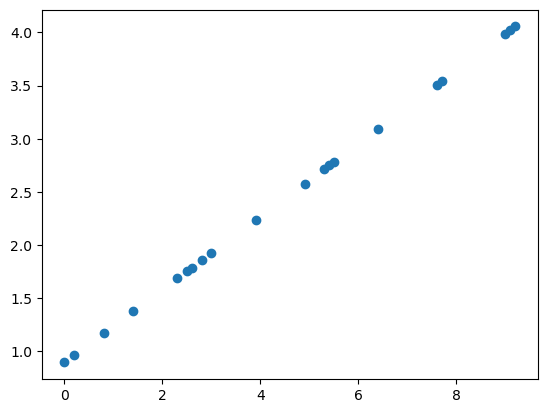

In [400]:
test.eval()
with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = test(X_test_set)
      plt.scatter(X_test_set, test_pred)
print(test_pred, y_test)
# plt.scatter(X_test_set, y_test)
# plt.scatter(X_train_set, y_train)
print(test.state_dict())

In [394]:
torch.save(test.state_dict(), "worflow_test.pth")

In [396]:
model = LinearRegressionModel()
model.load_state_dict(torch.load("worflow_test.pth"))

<All keys matched successfully>

In [398]:
model.state_dict()

OrderedDict([('layer.weight', tensor([[0.3434]])),
             ('layer.bias', tensor([0.8958]))])